<a href="https://colab.research.google.com/github/ibritics/Python_DataAnalytics_Tutorials/blob/main/Python_Files/Lecture06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B Testing

## Connecting to the Drive

## Import a data and explore it

In this tutorial, we will simulate an A/B test scenario to analyze the impact of performance bonuses on employee retention within an organization. We want to determine if providing performance bonuses (Plan B) leads to higher employee retention compared to not providing bonuses (Plan A).
https://blog.hubspot.com/marketing/how-to-do-a-b-testing

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Simulate data for Plan A (no bonuses) and Plan B (with bonuses)
plan_a_retention = np.random.uniform(0.7, 0.9, size=1000)
plan_b_retention = np.random.uniform(0.75, 0.95, size=1000)

# Create DataFrames for the two groups
data_a = pd.DataFrame({'Plan': 'A', 'Retention': plan_a_retention})
data_b = pd.DataFrame({'Plan': 'B', 'Retention': plan_b_retention})

# Combine data into one DataFrame
data = pd.concat([data_a, data_b])

# Display the first few rows
print(data.head())

  Plan  Retention
0    A   0.774908
1    A   0.890143
2    A   0.846399
3    A   0.819732
4    A   0.731204


In [2]:
from scipy.stats import ttest_ind

# Separate data into Plan A and Plan B
group_a = data[data['Plan'] == 'A']['Retention']
group_b = data[data['Plan'] == 'B']['Retention']

# Perform a t-test
t_stat, p_value = ttest_ind(group_a, group_b)

# Define significance level
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. Plan B has a statistically significant impact on employee retention.")
else:
    print("Fail to reject the null hypothesis. No significant impact on retention.")

Reject the null hypothesis. Plan B has a statistically significant impact on employee retention.


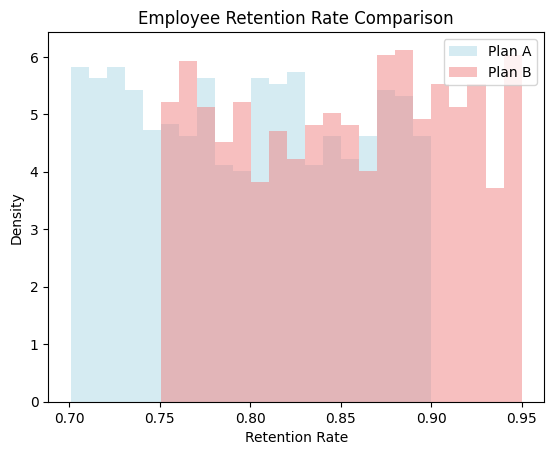

In [3]:
import matplotlib.pyplot as plt

# Create density histograms for Plan A and Plan B
plt.hist(group_a, bins=20, alpha=0.5, label='Plan A', color='lightblue', density=True)
plt.hist(group_b, bins=20, alpha=0.5, label='Plan B', color='lightcoral', density=True)
plt.xlabel('Retention Rate')
plt.ylabel('Density')
plt.title('Employee Retention Rate Comparison')
plt.legend()
plt.show()


# Text Analysis

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df= pd.read_csv('/content/drive/MyDrive/Preply/Mariia/Data/customer_service.csv' )

In [6]:
df.head()

,weekday,month,date,year,text
0,Thu,Oct,1,2015,@mjdout I know that can be frustrating..we hop...
1,Thu,Oct,1,2015,@rmarkerm Terribly sorry for the inconvenience...
2,Thu,Oct,1,2015,"@checho85 I can check, pls follow and DM your..."
3,Thu,Oct,1,2015,"@nealaa ...Alerts, pls check here: http://t.co..."
4,Thu,Oct,1,2015,@nealaa ...advisory has only been issued for t...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   weekday  1377 non-null   object
 1   month    1377 non-null   object
 2   date     1377 non-null   int64 
 3   year     1377 non-null   int64 
 4   text     1377 non-null   object
dtypes: int64(2), object(3)
memory usage: 53.9+ KB


Q1: What is the average length of a social customer service reply?

In [8]:
df['text'].str.len()

0       119
1       110
2        78
3        65
4       137
       ... 
1372     63
1373     50
1374    121
1375     27
1376     36
Name: text, Length: 1377, dtype: int64

In [9]:
df['text'].str.len().mean()

92.1445170660857

Q2: Which Agent Performes Better?


In [10]:
import re
pattern = r'\*(\w+)'

# Extract initials from the 'text' column and create a new 'initials' column
df['initials'] = df['text'].str.extract(pattern)

# Display the DataFrame with the 'initials' column
print(df['initials'])

0        AA
1        AA
2        AA
3        JH
4       NaN
       ... 
1372     DD
1373     RD
1374     DD
1375     DD
1376     CM
Name: initials, Length: 1377, dtype: object


<Axes: >

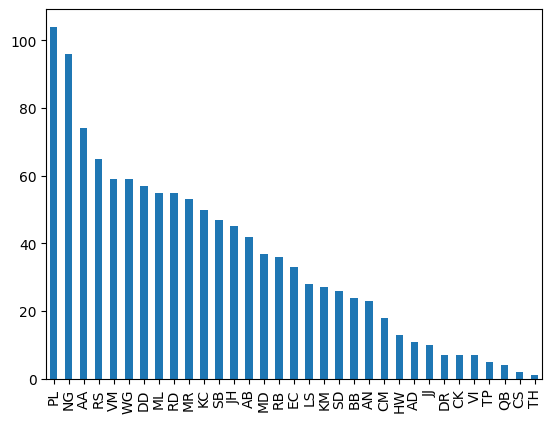

In [14]:
df['initials'].value_counts(sort= True).plot(kind='bar')

In [31]:
df['last_two_letters'] = df['text'].str[-2:]
print(df['last_two_letters'])

0       AA
1       AA
2       AA
3       /3
4       /3
        ..
1372    DD
1373    RD
1374    DD
1375    /2
1376    CM
Name: last_two_letters, Length: 1377, dtype: object


In [39]:
df['text'][4]

'@nealaa ...advisory has only been issued for the Bahamas, but that could change.  To check for updates on Weather advisories &amp;... 2/3'

In [32]:
frequency_table = df.groupby('last_two_letters').size()

In [36]:
frequency_table.head()

last_two_letters
/2    267
/3     69
/4     11
AA     62
AB     42
dtype: int64

Q3: How help is provided (link with helpful information or direct messages)? In case of links, what links were
referenced most often?

In [61]:
pattern = r'\b(http\S*)\b'
df['link'] = df['text'].str.extract(pattern)

In [53]:
df.groupby('link').size().sort_values(ascending= False)

link
http://t.co/ljzlFjyL3M     6
http://t.co/rKwjYwO72S     4
https://t.co/IlyARPdjVN    3
http://t.co/rKwjYwwvEi     2
http://t.co/xpEZNKiH6W     2
http://t.co/ZmxhkCBsLO     2
http://t.co/nqMYdHgUQj     2
http://t.co/pVGkVq0o4u     1
http://t.co/gZa1XM7gct     1
http://t.co/hYVHr8ef0v     1
http://t.co/jF5WmVPJz1     1
http://t.co/lVX4A4Qrpd     1
http://t.co/oKK9xP6hxa     1
http://t.co/0jlcZnT95Q     1
http://t.co/epU2KKNggx     1
http://t.co/roFfcdIAuu     1
http://t.co/sGbqJSi1Xt     1
http://t.co/sNIn5Equux     1
http://t.co/smJZ6lgNwl     1
http://t.co/ss99Yr9uYU     1
http://t.co/svrkVIIz3T     1
https://t.co/V4ImFwVZpA    1
http://t.co/gFwxgqsrku     1
http://t.co/dPlzzNCMhe     1
http://t.co/1Y3R2vs9bg     1
http://t.co/NjqbaYom1U     1
http://t.co/4ExPA5eJ9z     1
http://t.co/9H0kcm3RG8     1
http://t.co/AKUEAIxrX3     1
http://t.co/Dp9tC5VSuP     1
http://t.co/EPhpxGRweX     1
http://t.co/EcUbRXGfnl     1
http://t.co/LXe5HfHTns     1
http://t.co/N85Bmfc917     1
http://t.

In [77]:
round(df['link'].value_counts().sum()/len(df),3)

0.043

DM

In [25]:
pattern = re.compile(r'dm', re.IGNORECASE)
df['DM'] = df['text'].str.contains(pattern, regex= True)

In [28]:
round(df['DM'].sum()/len(df),3)

0.136

Find the numbers



In [56]:
pattern = r'^\d{3}-\d{3}-\d{4}$'

In [59]:
pattern = r'(\d{3}-\d{3}-\d{4})'

# Extract matching phone numbers and store in a new 'numbers' column
df['numbers'] = df['text'].str.extract(pattern)

In [66]:
df.groupby('numbers').size().sort_values(ascending=False)

numbers
800-221-1212    18
888-750-3284    11
800-455-2720     7
800-325-8224     5
866-783-2286     2
400-120-2364     1
773-601-1817     1
773-686-2385     1
773-686-6148     1
800-323-2323     1
877-220-6888     1
877-350-0038     1
904-741-2020     1
dtype: int64

In [69]:
df['numbers'].value_counts().sum()

51

In [78]:
round(df['numbers'].value_counts().sum()/len(df),3)

0.037